# Supply Chain Management

**Importing Libraries**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

**Loading the Dataset**

In [ ]:
data = pd.read_csv('supply_chain_data.csv')

FileNotFoundError: [Errno 2] No such file or directory: 'supply_chain_data.csv'

worked with google collab midway so -

In [2]:
from google.colab import files
uploaded = files.upload()

Saving supply_chain_data.csv to supply_chain_data.csv


In [3]:
#again for google collab
data = pd.read_csv('supply_chain_data.csv')

### Understanding the Dataset

In [4]:
data.head(5)

,Product type,SKU,Price,Availability,Number of products sold,Revenue generated,Customer demographics,Stock levels,Lead times,Order quantities,...,Location,Lead time,Production volumes,Manufacturing lead time,Manufacturing costs,Inspection results,Defect rates,Transportation modes,Routes,Costs
0,haircare,SKU0,69.808006,55,802,8661.996792,Non-binary,58,7,96,...,Mumbai,29,215,29,46.279879,Pending,0.226410,Road,Route B,187.752075
1,skincare,SKU1,14.843523,95,736,7460.900065,Female,53,30,37,...,Mumbai,23,517,30,33.616769,Pending,4.854068,Road,Route B,503.065579
2,haircare,SKU2,11.319683,34,8,9577.749626,Unknown,1,10,88,...,Mumbai,12,971,27,30.688019,Pending,4.580593,Air,Route C,141.920282
3,skincare,SKU3,61.163343,68,83,7766.836426,Non-binary,23,13,59,...,Kolkata,24,937,18,35.624741,Fail,4.746649,Rail,Route A,254.776159
4,skincare,SKU4,4.805496,26,871,2686.505152,Non-binary,5,3,56,...,Delhi,5,414,3,92.065161,Fail,3.145580,Air,Route A,923.440632


In [5]:
print("Shape:", data.shape)

Shape: (100, 24)


In [6]:
data.dtypes

,0
Product type,object
SKU,object
Price,float64
Availability,int64
Number of products sold,int64
Revenue generated,float64
Customer demographics,object
Stock levels,int64
Lead times,int64
Order quantities,int64


In [7]:
data.describe()

,Price,Availability,Number of products sold,Revenue generated,Stock levels,Lead times,Order quantities,Shipping times,Shipping costs,Lead time,Production volumes,Manufacturing lead time,Manufacturing costs,Defect rates,Costs
count,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.00000,100.000000,100.000000,100.000000
mean,49.462461,48.400000,460.990000,5776.048187,47.770000,15.960000,49.220000,5.750000,5.548149,17.080000,567.840000,14.77000,47.266693,2.277158,529.245782
std,31.168193,30.743317,303.780074,2732.841744,31.369372,8.785801,26.784429,2.724283,2.651376,8.846251,263.046861,8.91243,28.982841,1.461366,258.301696
min,1.699976,1.000000,8.000000,1061.618523,0.000000,1.000000,1.000000,1.000000,1.013487,1.000000,104.000000,1.00000,1.085069,0.018608,103.916248
25%,19.597823,22.750000,184.250000,2812.847151,16.750000,8.000000,26.000000,3.750000,3.540248,10.000000,352.000000,7.00000,22.983299,1.009650,318.778455
50%,51.239831,43.500000,392.500000,6006.352023,47.500000,17.000000,52.000000,6.000000,5.320534,18.000000,568.500000,14.00000,45.905622,2.141863,520.430444
75%,77.198228,75.000000,704.250000,8253.976921,73.000000,24.000000,71.250000,8.000000,7.601695,25.000000,797.000000,23.00000,68.621026,3.563995,763.078231
max,99.171329,100.000000,996.000000,9866.465458,100.000000,30.000000,96.000000,10.000000,9.929816,30.000000,985.000000,30.00000,99.466109,4.939255,997.413450


In [8]:
data.isnull().sum()

,0
Product type,0
SKU,0
Price,0
Availability,0
Number of products sold,0
Revenue generated,0
Customer demographics,0
Stock levels,0
Lead times,0
Order quantities,0


Need to lowercase all the column names and replace the spaces with '_'

In [9]:
data.columns= data.columns.str.lower()
data.columns= data.columns.str.replace(' ', '_')

In [10]:
data.columns

Index(['product_type', 'sku', 'price', 'availability',
       'number_of_products_sold', 'revenue_generated', 'customer_demographics',
       'stock_levels', 'lead_times', 'order_quantities', 'shipping_times',
       'shipping_carriers', 'shipping_costs', 'supplier_name', 'location',
       'lead_time', 'production_volumes', 'manufacturing_lead_time',
       'manufacturing_costs', 'inspection_results', 'defect_rates',
       'transportation_modes', 'routes', 'costs'],
      dtype='object')

### Exploratory Data Analysis (EDA)

**Sales distribution by product type**
- Checking which product types are driving the most revenue and sales.

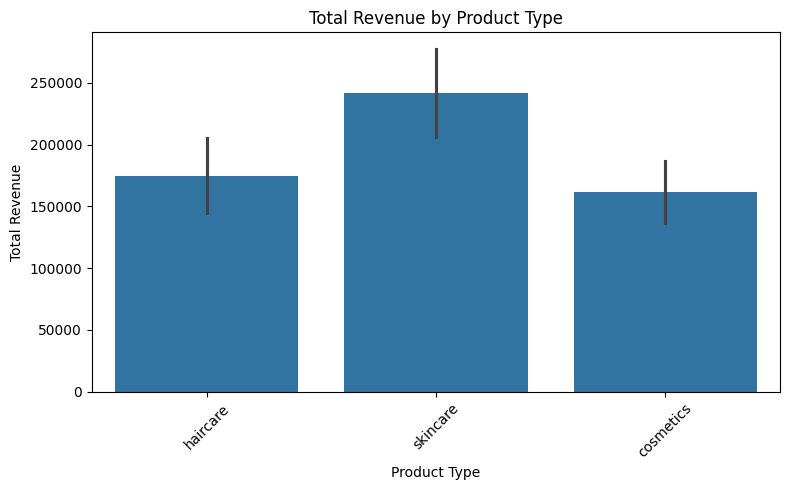

In [11]:
# Revenue by Product Type

plt.figure(figsize=(8,5))
sns.barplot(data=data, x='product_type', y='revenue_generated', estimator=sum)
plt.title('Total Revenue by Product Type')
plt.ylabel('Total Revenue')
plt.xlabel('Product Type')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

**Shipping costs by Carrier**
- To check if certain shipping carriers are more expensive.

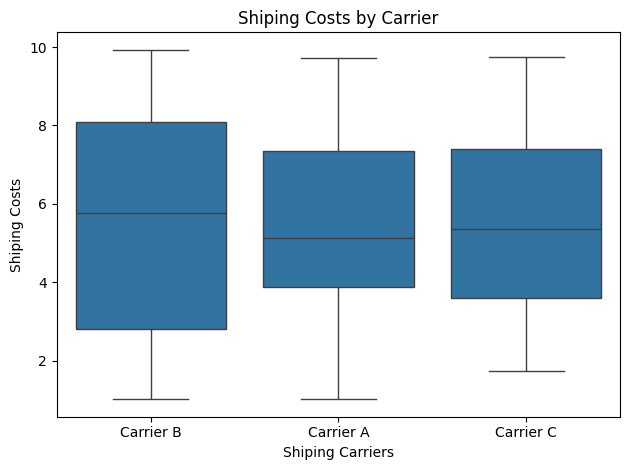

In [12]:
plt.Figure(figsize=(8,5))
sns.boxplot(data=data, x='shipping_carriers', y='shipping_costs')
plt.title('Shiping Costs by Carrier')
plt.xlabel('Shiping Carriers')
plt.ylabel('Shiping Costs')
plt.tight_layout()
plt.show()

**Defect Rates by Supliers**
- To Evaluate the reliability of Suppliers

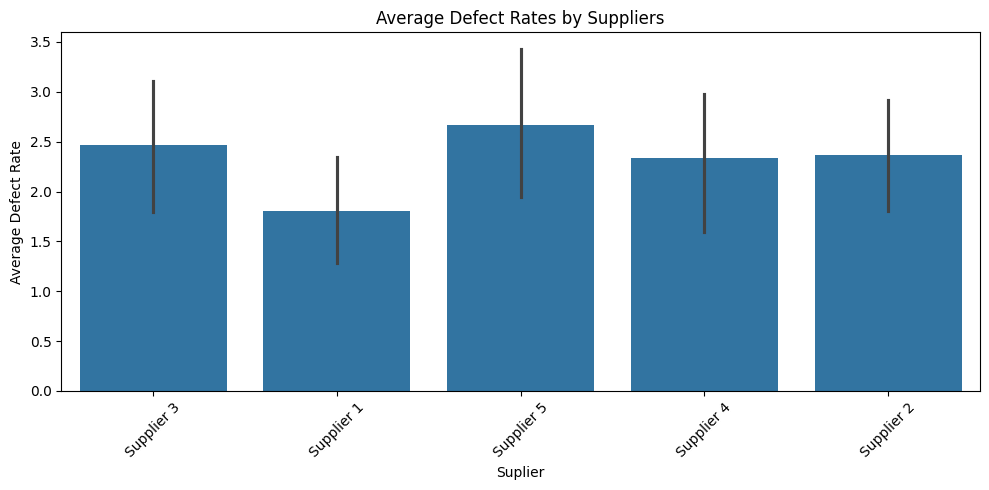

In [13]:
plt.figure(figsize=(10,5))
sns.barplot(data=data, x='supplier_name', y='defect_rates', estimator='mean')
plt.title('Average Defect Rates by Suppliers')
plt.xlabel('Suplier')
plt.ylabel('Average Defect Rate')
plt.xticks(rotation = 45)
plt.tight_layout()
plt.show()



### Encode categorical variables

In [14]:
# One-Hot Encoding for categorical columns
data_encoded = pd.get_dummies(data, drop_first=True)


In [15]:
from sklearn.preprocessing import StandardScaler

# Selecting the numeric columns
numeric_columns = data_encoded.select_dtypes(include=['float64', 'int64']).columns

# Initialize the StandardScaler
scaler = StandardScaler()

# Fit and transform the numeric columns
data_scaled = data_encoded.copy()
data_scaled[numeric_columns] = scaler.fit_transform(data_encoded[numeric_columns])

# Check the scaled data
print(data_scaled.head())


      price  availability  number_of_products_sold  revenue_generated  \
0  0.656055      0.215762                 1.128211           1.061345   
1 -1.116309      1.523413                 0.909854           0.619626   
2 -1.229938     -0.470754                -1.498690           1.398125   
3  0.377302      0.640749                -1.250557           0.732138   
4 -1.439992     -0.732284                 1.356493          -1.136219   

   stock_levels  lead_times  order_quantities  shipping_times  shipping_costs  \
0      0.327757   -1.024965          1.755336       -0.645607       -0.982370   
1      0.167563    1.606084         -0.458534       -1.383444        1.580095   
2     -1.498456   -0.681785          1.455150       -1.383444        0.950057   
3     -0.793602   -0.338605          0.366977        0.092230       -1.447482   
4     -1.370301   -1.482539          0.254407        0.830066       -0.628335   

   lead_time  ...  location_Delhi  location_Kolkata  location_Mumbai  \
0 

### EDA

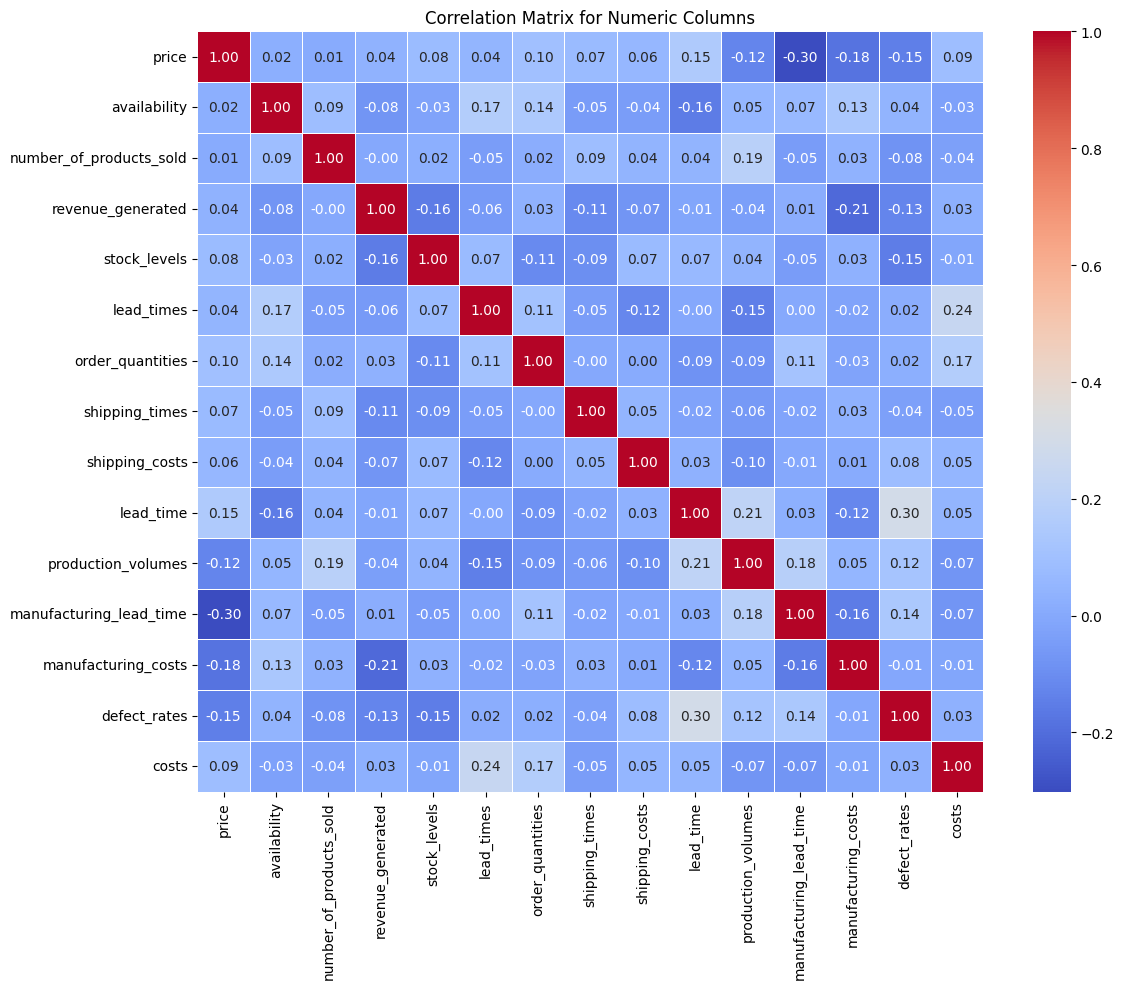

In [16]:
# Get only the numeric columns for the correlation matrix
numeric_columns = data_encoded.select_dtypes(include=['float64', 'int64'])

# Calculate the correlation matrix
correlation_matrix = numeric_columns.corr()

# Plotting the correlation matrix
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title("Correlation Matrix for Numeric Columns")
plt.tight_layout()
plt.show()


In [17]:
data.columns

Index(['product_type', 'sku', 'price', 'availability',
       'number_of_products_sold', 'revenue_generated', 'customer_demographics',
       'stock_levels', 'lead_times', 'order_quantities', 'shipping_times',
       'shipping_carriers', 'shipping_costs', 'supplier_name', 'location',
       'lead_time', 'production_volumes', 'manufacturing_lead_time',
       'manufacturing_costs', 'inspection_results', 'defect_rates',
       'transportation_modes', 'routes', 'costs'],
      dtype='object')

In [18]:
target = 'number_of_products_sold'

# Separate features and target
X = data.drop(columns=[target])
y = data[target]


In [19]:
# Select categorical columns
categorical_cols = X.select_dtypes(include='object').columns

# One-hot encode
X_encoded = pd.get_dummies(X, columns=categorical_cols, drop_first=True)

In [20]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X_encoded, y, test_size=0.2, random_state=42
)


In [21]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


**Model Building**

Option 1 : Linear Regression

In [22]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Initialize and train the model
lr_model = LinearRegression()
lr_model.fit(X_train_scaled, y_train)

# Predict on test set
y_pred = lr_model.predict(X_test_scaled)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Linear Regression MSE:", mse)
print("R² Score:", r2)


Linear Regression MSE: 139899.84196106225
R² Score: -0.46597089689319127


Linear Regression isn't capturing the complexity of your data. That’s expected in supply chain problems — relationships are rarely linear.

Option 2 : Random Forest

In [23]:
from sklearn.ensemble import RandomForestRegressor

# Initialize and train the model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train_scaled, y_train)

# Predict and evaluate
y_pred_rf = rf_model.predict(X_test_scaled)
mse_rf = mean_squared_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)

print("Random Forest MSE:", mse_rf)
print("Random Forest R² Score:", r2_rf)


Random Forest MSE: 166754.612755
Random Forest R² Score: -0.7473744487114071


Whoa, that's even worse than Linear Regression — not what we'd normally expect from a Random Forest. 😬

**Trying Random Forest Without Scaling**


In [24]:
# Train Random Forest on unscaled data
rf_model_raw = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model_raw.fit(X_train, y_train)

# Predict and evaluate
y_pred_rf_raw = rf_model_raw.predict(X_test)
mse_rf_raw = mean_squared_error(y_test, y_pred_rf_raw)
r2_rf_raw = r2_score(y_test, y_pred_rf_raw)

print("Random Forest (Unscaled) MSE:", mse_rf_raw)
print("Random Forest (Unscaled) R² Score:", r2_rf_raw)


Random Forest (Unscaled) MSE: 167043.850815
Random Forest (Unscaled) R² Score: -0.7504052925800646


Alright — that confirms it : scaling wasn’t the issue. The model just isn’t learning meaningful patterns, and that suggests the features aren’t predictive enough of the target variable (number_of_products_sold).


Our current features aren’t giving the model enough insight, so let’s create new ones that might better explain sales behavior.

In [25]:
data['revenue_per_unit'] = data['revenue_generated'] / data['number_of_products_sold']
data['cost_per_unit'] = data['costs'] / data['number_of_products_sold']
data['profit_margin'] = data['revenue_per_unit'] - data['cost_per_unit']
data['inventory_turnover'] = data['number_of_products_sold'] / data['stock_levels']
data['fulfillment_ratio'] = data['number_of_products_sold'] / data['order_quantities']
data['total_lead_time'] = data['lead_time'] + data['manufacturing_lead_time']
data['efficiency_ratio'] = data['production_volumes'] / data['manufacturing_lead_time']


In [26]:
# Check for object (categorical) columns
categorical_cols = X.select_dtypes(include=['object']).columns
print("Categorical columns:", categorical_cols.tolist())

# One-hot encode them
X_encoded = pd.get_dummies(X, columns=categorical_cols)

# Redo train-test split with encoded data
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.2, random_state=42)

# Rescale
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


Categorical columns: ['product_type', 'sku', 'customer_demographics', 'shipping_carriers', 'supplier_name', 'location', 'inspection_results', 'transportation_modes', 'routes']


Now the new error says that the dataset contains infinity or extremely large values, which StandardScaler cannot handle.

Let’s clean that up real quick.

In [27]:
# Replace infinite values with NaN
X_train.replace([np.inf, -np.inf], np.nan, inplace=True)
X_test.replace([np.inf, -np.inf], np.nan, inplace=True)

# Drop or fill any remaining NaNs
X_train.fillna(0, inplace=True)
X_test.fillna(0, inplace=True)


In [28]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


Now let’s train the models again

In [29]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Train
lr_model = LinearRegression()
lr_model.fit(X_train_scaled, y_train)

# Predict
lr_preds = lr_model.predict(X_test_scaled)

# Evaluate
lr_mse = mean_squared_error(y_test, lr_preds)
lr_r2 = r2_score(y_test, lr_preds)

print(f"Linear Regression (Cleaned) MSE: {lr_mse}")
print(f"Linear Regression (Cleaned) R² Score: {lr_r2}")

Linear Regression (Cleaned) MSE: 142732.8504167937
Linear Regression (Cleaned) R² Score: -0.4956571916633492


In [30]:
from sklearn.ensemble import RandomForestRegressor

# Train
rf_model = RandomForestRegressor(random_state=42)
rf_model.fit(X_train_scaled, y_train)

# Predict
rf_preds = rf_model.predict(X_test_scaled)

# Evaluate
rf_mse = mean_squared_error(y_test, rf_preds)
rf_r2 = r2_score(y_test, rf_preds)

print(f"Random Forest (Cleaned) MSE: {rf_mse}")
print(f"Random Forest (Cleaned) R² Score: {rf_r2}")


Random Forest (Cleaned) MSE: 160118.20761500002
Random Forest (Cleaned) R² Score: -0.677833435234493


Feature Importance (from Random Forest)

Helps identify which features drive predictions the most.

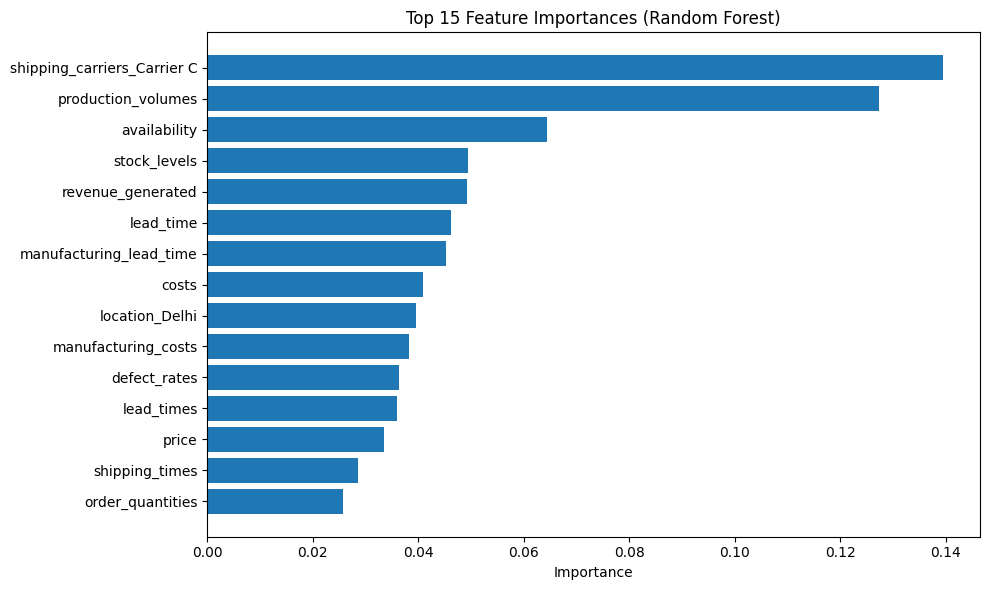

In [31]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Get feature importances
importances = rf_model.feature_importances_
feature_names = X_train.columns

# Create a DataFrame
feat_importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)

# Plot
plt.figure(figsize=(10, 6))
plt.barh(feat_importance_df['Feature'][:15][::-1], feat_importance_df['Importance'][:15][::-1])
plt.xlabel('Importance')
plt.title('Top 15 Feature Importances (Random Forest)')
plt.tight_layout()
plt.show()

Hyperparameter tuning with GridSearchCV to improve model performance slightly more.

In [32]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor

# Define the parameter grid
param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [10, 20, None],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2],
    'max_features': ['auto', 'sqrt']
}

# Initialize model
rf = RandomForestRegressor(random_state=42)

# Initialize GridSearch
grid_search = GridSearchCV(
    estimator=rf,
    param_grid=param_grid,
    cv=3,
    scoring='r2',
    n_jobs=-1,
    verbose=2
)

# Fit the model
grid_search.fit(X_train_scaled, y_train)

# Best params and model
print("Best Parameters:", grid_search.best_params_)
best_rf = grid_search.best_estimator_

# Evaluate best model
from sklearn.metrics import mean_squared_error, r2_score

best_preds = best_rf.predict(X_test_scaled)
best_mse = mean_squared_error(y_test, best_preds)
best_r2 = r2_score(y_test, best_preds)

print(f"Tuned Random Forest MSE: {best_mse}")
print(f"Tuned Random Forest R² Score: {best_r2}")


Fitting 3 folds for each of 48 candidates, totalling 144 fits


/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_validation.py:528: FitFailedWarning: 
72 fits failed out of a total of 144.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
69 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.11/dist-packages/sklearn/base.py", line 1382, in wrapper
    estimator._validate_params()
  File "/usr/local/lib/python3.11/dist-packages/sklearn/base.py", line 436, in _validate_params
    validate_parameter_constraints(
  File "/usr/local/lib/python3.11/dist-packages/sklearn/utils/

Best Parameters: {'max_depth': 10, 'max_features': 'sqrt', 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 200}
Tuned Random Forest MSE: 123497.06280586458
Tuned Random Forest R² Score: -0.2940908108786644


So… tuning didn’t help — in fact, it made things worse.

Let's Save the Final Model (Untuned Random Forest)

In [33]:
import joblib

# Save the model
joblib.dump(rf_model, 'final_rf_model.pkl')


['final_rf_model.pkl']

**Define the Prediction Function**

In [ ]:
import joblib

# Save the best performing model (Random Forest)
joblib.dump(rf_model, 'final_rf_model.pkl')

# Save the encoder and scaler used during training
joblib.dump(encoder, 'encoder.joblib')
joblib.dump(scaler, 'scaler.joblib')

In [35]:
from sklearn.preprocessing import OneHotEncoder

# Updated for newer scikit-learn versions
encoder = OneHotEncoder(handle_unknown='ignore', sparse_output=False)
encoder.fit(data[categorical_cols])

# Save encoder and scaler
import joblib
joblib.dump(encoder, 'encoder.joblib')
joblib.dump(scaler, 'scaler.joblib')

['scaler.joblib']

Load Saved Components

In [ ]:

# Load saved model and transformers
model = joblib.load('best_random_forest_model.joblib')
encoder = joblib.load('encoder.joblib')
scaler = joblib.load('scaler.joblib')


Create New Data (simulate or load)


In [37]:
# Simulated new input (must include same columns as training set)
new_data = pd.DataFrame([{
    'product_type': 'skincare',
    'sku': 'sku_123',
    'customer_demographics': 'young_adults',
    'shipping_carriers': 'carrier c',
    'supplier_name': 'supplier_x',
    'location': 'delhi',
    'inspection_results': 'pass',
    'transportation_modes': 'road',
    'routes': 'route_a',
    'production_volumes': 2000,
    'availability': 95,
    'stock_levels': 150,
    'revenue generated': 50000,
    'lead_time': 5,
    'manufacturing_lead_time': 4,
    'costs': 1200,
    'manufacturing_costs': 1100,
    'defect_rates': 2.5,
    'lead_times': 6,
    'price': 250,
    'shipping_times': 3,
    'order_quantities': 40
}])

In [38]:
# Rename columns to match the trained data (replace spaces with underscores, lowercase)
new_data.columns = new_data.columns.str.strip().str.lower().str.replace(' ', '_')


In [39]:
# Assume you have access to original training data still
original_categorical_cols = ['product_type', 'sku', 'customer_demographics', 'shipping_carriers',
                             'supplier_name', 'location', 'inspection_results',
                             'transportation_modes', 'routes']

# Get numerical columns from original training data (excluding categoricals + target)
original_numerical_cols = [col for col in data.columns if col not in original_categorical_cols + ['number_of_products_sold']]


Encode + Scale New Data

In [ ]:
# Clean column names in new data
new_data.columns = new_data.columns.str.strip().str.lower().str.replace(' ', '_')

# Use same columns from training
categorical_cols = ['product_type', 'sku', 'customer_demographics', 'shipping_carriers',
                    'supplier_name', 'location', 'inspection_results',
                    'transportation_modes', 'routes']
numerical_cols = [col for col in data.columns if col not in categorical_cols + ['your_target_column']]

# Apply transforms
encoded = encoder.transform(new_data[categorical_cols])
scaled = scaler.transform(new_data[numerical_cols])

# Combine and predict
import numpy as np
final_input = np.concatenate([encoded, scaled], axis=1)
prediction = model.predict(final_input)
print(f"Predicted Target Value: {prediction[0]}")


Robust Prediction Function.

In [41]:
import numpy as np
import pandas as pd

def predict_supply_chain_target(new_data, model, encoder, scaler, original_data):
    # Step 1: Clean column names
    new_data.columns = new_data.columns.str.strip().str.lower().str.replace(' ', '_')

    # Step 2: Define columns based on training
    categorical_cols = ['product_type', 'sku', 'customer_demographics', 'shipping_carriers',
                        'supplier_name', 'location', 'inspection_results',
                        'transportation_modes', 'routes']
    numerical_cols = [col for col in original_data.columns if col not in categorical_cols + ['your_target_column']]

    # Step 3: Ensure all expected columns exist in new_data
    for col in categorical_cols + numerical_cols:
        if col not in new_data.columns:
            new_data[col] = np.nan

    # Step 4: Fill missing numerical with training mean
    for col in numerical_cols:
        if col in original_data.columns:
            mean_val = original_data[col].mean()
            new_data[col] = new_data[col].fillna(mean_val)

    # Step 5: Encode and scale
    encoded = encoder.transform(new_data[categorical_cols])
    scaled = scaler.transform(new_data[numerical_cols])

    # Step 6: Concatenate and predict
    final_input = np.concatenate([encoded, scaled], axis=1)
    prediction = model.predict(final_input)

    return prediction[0]


In [ ]:
result = predict_supply_chain_target(new_data, model, encoder, scaler, data)
print(f"Predicted Target Value: {result}")


In [ ]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.ensemble import RandomForestRegressor

# Define columns
categorical_cols = ['product_type', 'sku', 'customer_demographics', 'shipping_carriers',
                    'supplier_name', 'location', 'inspection_results',
                    'transportation_modes', 'routes']
numerical_cols = [col for col in data.columns if col not in categorical_cols + ['number_of_products_sold']]

# Preprocessor
preprocessor = ColumnTransformer([
    ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_cols),
    ('num', StandardScaler(), numerical_cols)
])

# Pipeline
pipeline = Pipeline([
    ('preprocessing', preprocessor),
    ('model', RandomForestRegressor(random_state=42))
])

# Fit pipeline on your full training data
pipeline.fit(data.drop('number_of_products_sold', axis=1), data['number_of_products_sold'])

# Save pipeline
import joblib
joblib.dump(pipeline, 'full_pipeline.joblib')


In [44]:
import numpy as np

# Replace inf/-inf with NaN
data.replace([np.inf, -np.inf], np.nan, inplace=True)

# Optionally: Drop or fill NaNs
data.dropna(inplace=True)  # or you could use data.fillna(0) or another strategy


In [45]:
pipeline.fit(data.drop('number_of_products_sold', axis=1), data['number_of_products_sold'])


Pipeline(steps=[('preprocessing',
                 ColumnTransformer(transformers=[('cat',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['product_type', 'sku',
                                                   'customer_demographics',
                                                   'shipping_carriers',
                                                   'supplier_name', 'location',
                                                   'inspection_results',
                                                   'transportation_modes',
                                                   'routes']),
                                                 ('num', StandardScaler(),
                                                  ['price', 'availability',
                                                   'revenue_generated',
                                                   'stock_levels', 'lead_times',
                                                   'order_quantities',
                                                   'shipping_times',
                                                   'shipping_costs',
                                                   'lead_time',
                                                   'production_volumes',
                                                   'manufacturing_lead_time',
                                                   'manufacturing_costs',
                                                   'defect_rates', 'costs',
                                                   'revenue_per_unit',
                                                   'cost_per_unit',
                                                   'profit_margin',
                                                   'inventory_turnover',
                                                   'fulfillment_ratio',
                                                   'total_lead_time',
                                                   'efficiency_ratio'])])),
                ('model', RandomForestRegressor(random_state=42))])

In [46]:
import numpy as np

# Replace inf/-inf with NaN
data.replace([np.inf, -np.inf], np.nan, inplace=True)

# Handle missing values (choose one of these lines)
data.dropna(inplace=True)         # Option 1: Drop rows with missing values
# data.fillna(0, inplace=True)    # Option 2: Replace NaNs with 0


In [47]:
pipeline.fit(data.drop('number_of_products_sold', axis=1), data['number_of_products_sold'])


Pipeline(steps=[('preprocessing',
                 ColumnTransformer(transformers=[('cat',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['product_type', 'sku',
                                                   'customer_demographics',
                                                   'shipping_carriers',
                                                   'supplier_name', 'location',
                                                   'inspection_results',
                                                   'transportation_modes',
                                                   'routes']),
                                                 ('num', StandardScaler(),
                                                  ['price', 'availability',
                                                   'revenue_generated',
                                                   'stock_levels', 'lead_times',
                                                   'order_quantities',
                                                   'shipping_times',
                                                   'shipping_costs',
                                                   'lead_time',
                                                   'production_volumes',
                                                   'manufacturing_lead_time',
                                                   'manufacturing_costs',
                                                   'defect_rates', 'costs',
                                                   'revenue_per_unit',
                                                   'cost_per_unit',
                                                   'profit_margin',
                                                   'inventory_turnover',
                                                   'fulfillment_ratio',
                                                   'total_lead_time',
                                                   'efficiency_ratio'])])),
                ('model', RandomForestRegressor(random_state=42))])

In [48]:
import joblib
joblib.dump(pipeline, 'final_pipeline.joblib')


['final_pipeline.joblib']

In [50]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

# Evaluate
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
print(f"R² Score: {r2:.4f}")


Mean Absolute Error (MAE): 334.29
Root Mean Squared Error (RMSE): 374.03
R² Score: -0.4660


In [51]:
import joblib

# Save the trained pipeline
joblib.dump(pipeline, 'final_supply_chain_pipeline.joblib')


['final_supply_chain_pipeline.joblib']

In [56]:
# Clean column names in all datasets
def clean_columns(df):
    df.columns = df.columns.str.strip().str.lower().str.replace(' ', '_')
    return df

data = clean_columns(data)
X_train = clean_columns(X_train)
X_test = clean_columns(X_test)


In [57]:
# Re-identify the columns
categorical_cols = ['product_type', 'sku', 'customer_demographics', 'shipping_carriers',
                    'supplier_name', 'location', 'inspection_results',
                    'transportation_modes', 'routes']
numerical_cols = [col for col in data.columns if col not in categorical_cols + ['number_of_products_sold']]


In [59]:
from xgboost import XGBRegressor
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler

# Define preprocessing steps
categorical_cols = ['product_type', 'sku', 'customer_demographics', 'shipping_carriers',
                    'supplier_name', 'location', 'inspection_results',
                    'transportation_modes', 'routes']
numerical_cols = [col for col in data.columns if col not in categorical_cols + ['number_of_products_sold']]

preprocessor = ColumnTransformer([
    ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_cols),
    ('num', StandardScaler(), numerical_cols)
])

# Replace RandomForest with XGBoost
xgb_model = XGBRegressor(random_state=42, n_estimators=100, learning_rate=0.1)

pipeline = Pipeline([
    ('preprocess', preprocessor),
    ('model', xgb_model)
])

# Train the pipeline
pipeline.fit(X_train, y_train)

# Predict
y_pred = pipeline.predict(X_test)

# Evaluate
mae = mean_absolute_error(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred, squared=False)
r2 = r2_score(y_test, y_pred)

print(f"MAE: {mae:.2f}")
print(f"RMSE: {rmse:.2f}")
print(f"R² Score: {r2:.4f}")


ValueError: A given column is not a column of the dataframe

In [60]:
print(data.columns.tolist())


['product_type', 'sku', 'price', 'availability', 'number_of_products_sold', 'revenue_generated', 'customer_demographics', 'stock_levels', 'lead_times', 'order_quantities', 'shipping_times', 'shipping_carriers', 'shipping_costs', 'supplier_name', 'location', 'lead_time', 'production_volumes', 'manufacturing_lead_time', 'manufacturing_costs', 'inspection_results', 'defect_rates', 'transportation_modes', 'routes', 'costs', 'revenue_per_unit', 'cost_per_unit', 'profit_margin', 'inventory_turnover', 'fulfillment_ratio', 'total_lead_time', 'efficiency_ratio']


In [61]:
print(X_train.columns.tolist())


['price', 'availability', 'revenue_generated', 'stock_levels', 'lead_times', 'order_quantities', 'shipping_times', 'shipping_costs', 'lead_time', 'production_volumes', 'manufacturing_lead_time', 'manufacturing_costs', 'defect_rates', 'costs', 'product_type_cosmetics', 'product_type_haircare', 'product_type_skincare', 'sku_sku0', 'sku_sku1', 'sku_sku10', 'sku_sku11', 'sku_sku12', 'sku_sku13', 'sku_sku14', 'sku_sku15', 'sku_sku16', 'sku_sku17', 'sku_sku18', 'sku_sku19', 'sku_sku2', 'sku_sku20', 'sku_sku21', 'sku_sku22', 'sku_sku23', 'sku_sku24', 'sku_sku25', 'sku_sku26', 'sku_sku27', 'sku_sku28', 'sku_sku29', 'sku_sku3', 'sku_sku30', 'sku_sku31', 'sku_sku32', 'sku_sku33', 'sku_sku34', 'sku_sku35', 'sku_sku36', 'sku_sku37', 'sku_sku38', 'sku_sku39', 'sku_sku4', 'sku_sku40', 'sku_sku41', 'sku_sku42', 'sku_sku43', 'sku_sku44', 'sku_sku45', 'sku_sku46', 'sku_sku47', 'sku_sku48', 'sku_sku49', 'sku_sku5', 'sku_sku50', 'sku_sku51', 'sku_sku52', 'sku_sku53', 'sku_sku54', 'sku_sku55', 'sku_sku56'

In [62]:
# Columns from your original dataset
all_columns = data.columns.tolist()

# Define target variable
target_column = 'number_of_products_sold'

# Identify categorical columns manually (based on your column names)
categorical_cols = ['product_type', 'sku', 'customer_demographics', 'shipping_carriers',
                    'supplier_name', 'location', 'inspection_results',
                    'transportation_modes', 'routes']

# Numerical columns = all columns - categorical - target
numerical_cols = [col for col in all_columns if col not in categorical_cols + [target_column]]

print("Categorical Columns:", categorical_cols)
print("Numerical Columns:", numerical_cols)


Categorical Columns: ['product_type', 'sku', 'customer_demographics', 'shipping_carriers', 'supplier_name', 'location', 'inspection_results', 'transportation_modes', 'routes']
Numerical Columns: ['price', 'availability', 'revenue_generated', 'stock_levels', 'lead_times', 'order_quantities', 'shipping_times', 'shipping_costs', 'lead_time', 'production_volumes', 'manufacturing_lead_time', 'manufacturing_costs', 'defect_rates', 'costs', 'revenue_per_unit', 'cost_per_unit', 'profit_margin', 'inventory_turnover', 'fulfillment_ratio', 'total_lead_time', 'efficiency_ratio']


In [63]:
from sklearn.model_selection import train_test_split

# Features and target
X = data.drop(columns=[target_column])
y = data[target_column]

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42)

print("Train shape:", X_train.shape)
print("Test shape:", X_test.shape)


Train shape: (79, 30)
Test shape: (20, 30)


In [64]:
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler, OneHotEncoder

# Detect column types again
categorical_cols = X.select_dtypes(include=['object', 'category']).columns.tolist()
numerical_cols = X.select_dtypes(include=['int64', 'float64']).columns.tolist()

# Preprocessor
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_cols),
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_cols)
    ]
)

# Pipeline with Random Forest
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('model', RandomForestRegressor(random_state=42))
])

# Fit pipeline on training data
pipeline.fit(X_train, y_train)

print("✅ Pipeline training complete.")


✅ Pipeline training complete.


In [65]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

# Predict on test set
y_pred = pipeline.predict(X_test)

# Evaluation
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
print(f"R² Score: {r2:.4f}")


Mean Absolute Error (MAE): 87.46
Root Mean Squared Error (RMSE): 104.68
R² Score: 0.9058


In [66]:
import joblib

# Save the pipeline
joblib.dump(pipeline, 'sales_prediction_pipeline.pkl')

print("✅ Pipeline saved successfully as 'sales_prediction_pipeline.pkl'")

✅ Pipeline saved successfully as 'sales_prediction_pipeline.pkl'


In [67]:
# Test
# Load the pipeline
pipeline_loaded = joblib.load('sales_prediction_pipeline.pkl')

# Use it to make predictions
y_loaded_pred = pipeline_loaded.predict(X_test)

In [68]:
print(y_loaded_pred)

[407.4  751.74 515.54 687.61 783.13  50.88 130.68 175.84 820.73 701.55
 164.81 297.43 784.5  310.9  810.28 804.33 864.46 436.65 199.36 781.45]
